In [1]:
# supress unnecessary warnings so the notebook looks clean
import warnings
warnings.filterwarnings('ignore')

# import libraries to quickly analyze data
import numpy as np
import pandas as pd
pd.set_option('precision', 4)

# import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
%matplotlib inline
from plotly.offline import plot

In [2]:
# read the input
data = pd.read_csv("datasets/loan.csv") 

In [3]:
# memory usage
print('Memory consumption for the data, Mb: {:.2f}'.format(data.memory_usage().sum()/2**20))

Memory consumption for the data, Mb: 500.99


In [4]:
pd.set_option('display.max_columns', len(data.columns))
#pd.set_option('display.max_rows', 999)
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.0714,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.7100,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.6536,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Analysis

### 1. Missing Values

In [5]:
print("%20s \t \t \t Count \t \t \t  Pct missing" % 'Feature')

for column_name, column in data.transpose().iterrows():
    naCount = sum(column.isnull())
    if naCount > 0:
       #print column_name, naCount, "Percent missing: %f%%" % 100.*naCount/train.shape[0]
       print("%20s \t \t \t %5d  \t \t \t %2.2f%%" % (column_name, naCount, 100.*naCount/data.shape[0]))

             Feature 	 	 	 Count 	 	 	  Pct missing
           emp_title 	 	 	 51457  	 	 	 5.80%
          annual_inc 	 	 	     4  	 	 	 0.00%
                desc 	 	 	 761350  	 	 	 85.80%
               title 	 	 	   151  	 	 	 0.02%
         delinq_2yrs 	 	 	    29  	 	 	 0.00%
    earliest_cr_line 	 	 	    29  	 	 	 0.00%
      inq_last_6mths 	 	 	    29  	 	 	 0.00%
mths_since_last_delinq 	 	 	 454312  	 	 	 51.20%
mths_since_last_record 	 	 	 750326  	 	 	 84.56%
            open_acc 	 	 	    29  	 	 	 0.00%
             pub_rec 	 	 	    29  	 	 	 0.00%
          revol_util 	 	 	   502  	 	 	 0.06%
           total_acc 	 	 	    29  	 	 	 0.00%
        last_pymnt_d 	 	 	 17659  	 	 	 1.99%
        next_pymnt_d 	 	 	 252971  	 	 	 28.51%
  last_credit_pull_d 	 	 	    53  	 	 	 0.01%
collections_12_mths_ex_med 	 	 	   145  	 	 	 0.02%
mths_since_last_major_derog 	 	 	 665676  	 	 	 75.02%
    annual_inc_joint 	 	 	 886868  	 	 	 99.94%
           dti_joint 	 	 	 886870  	 	 	 99.9

#### $\star$ Fix missing values - Categorical:

For the categorical variables we are just going to replace NaN with 'Unknown'. We will fill verification_status_joint using the value in verification_status as these are all individual applications and these values are not filled out.

In [6]:
data['verification_status_joint'].fillna(data['verification_status'], inplace=True)

strColumns = data.select_dtypes(include=['object']).columns.values
data[strColumns] = data[strColumns].fillna('Unknown')

# check that all the NaN values have been replaced
data.select_dtypes(exclude=[np.number]).isnull().sum().sum()

0

#### $\star$ Fix missing values - Numeric:

The first columns that we are going to update are annual_inc_joint and dti_joint. For individual accounts these are blank but we want to use the joint values so we will populate these with the individual values for individual accounts. For the remainder of the missing values we are going to fix the missing values by replacing any NaN values with the mean values.

In [7]:
data[data['application_type'] != 'INDIVIDUAL']['annual_inc_joint'].isnull().sum()
data['annual_inc_joint'].fillna(data['annual_inc'], inplace=True)
data['dti_joint'].fillna(data['dti'], inplace=True)

strColumns = data.select_dtypes(include=[np.number]).columns.values
data[strColumns] = data[strColumns].fillna(data[strColumns].mean())

#Check that all the NaN values have been replaced
data.select_dtypes(include=[np.number]).isnull().sum().sum()

0

### 2. Feature Engineering

####  $\star$ Loan Status and Create Variable for Default

The loan status field has a number of different values. Also we are going to group the default into a single category.

In [8]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

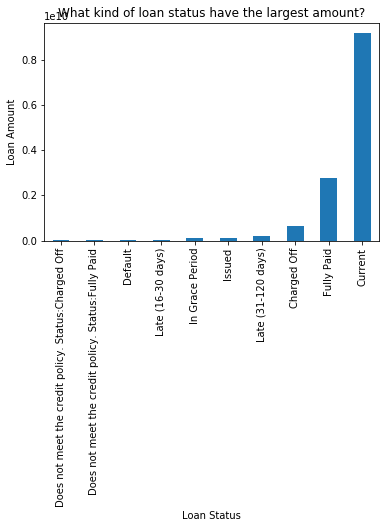

In [9]:
data.groupby('loan_status')['loan_amnt'].sum().sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('What kind of loan status have the largest amount?')

First we are going to remove the 'issued' and 'does not meet credit policy' loans as these are either brand new loans or loans that didn't meet the credit policy and were forced to be closed. We can't learn much from them in terms of predicting whether the client will default by themselves.

In [10]:
data = data[~data['loan_status'].isin(['Issued',
                                       'Does not meet the credit policy. Status:Fully Paid',
                                       'Does not meet the credit policy. Status:Charged Off'])]

Next we are going to create a default.

'In grace period' is technically a late payment but for this we are not going to include it as a default since these include timing of payments being a day late etc. We are more interested in predicting the loans that will be significantly late with a payment and eventually default on the loan. These are the loans and may have to be written off or sent to a collection agency.

In [11]:
def CreateDefault(Loan_Status):
    if Loan_Status in ['Current', 'Fully Paid', 'In Grace Period']:
        return 0
    else:
        return 1 
    
data['Default'] = data['loan_status'].apply(lambda x: CreateDefault(x))
data['Default'].head()

0    0
1    1
2    0
3    0
4    0
Name: Default, dtype: int64

####  $\star$ Title

In [12]:
data['title'].value_counts().head(n=10)

Debt consolidation         409252
Credit card refinancing    162288
Home improvement            39624
Other                       31423
Debt Consolidation          15692
Major purchase              11867
Business                     6614
Medical expenses             6584
Car financing                5483
Consolidation                5351
Name: title, dtype: int64

A [wordcloud][wordcloud] is a graphical representation of the vocabulary of a document or set of documents, which tries to represent the relative topical importance of words by varying font size. Despite some intrinsic limitations, it is an excellent tool for document visualization which often tells you something about the topic or key ideas.

[wordcloud]:http://peekaboo-vision.blogspot.tw/2012/11/a-wordcloud-in-python.html

(-0.5, 399.5, 199.5, -0.5)

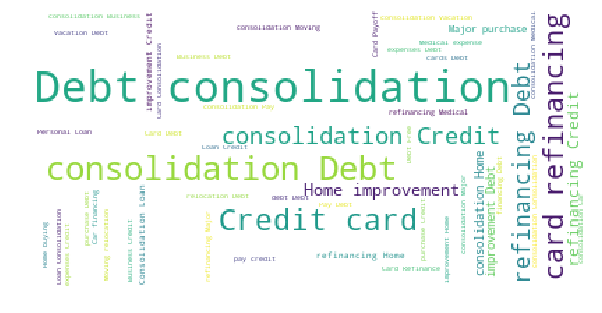

In [13]:
from wordcloud import WordCloud

plt.figure(figsize=(10,7))
text = data['title'].to_json()
wc = WordCloud(ranks_only=True,prefer_horizontal = 0.6,background_color = 'white', max_words = 50).generate(text)
plt.imshow(wc)
plt.axis("off")

####  $\star$ Purpose

In [14]:
data['purpose'].value_counts().head(n=10)

debt_consolidation    518319
credit_card           203771
home_improvement       51122
other                  41990
major_purchase         16970
small_business         10104
car                     8718
medical                 8391
moving                  5316
vacation                4660
Name: purpose, dtype: int64

The vast majority of loans are debt consolidation both of other loans and credit card debt.

####  $\star$ Annual Income

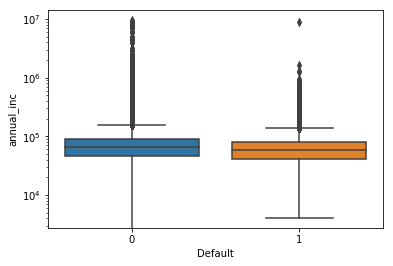

In [15]:
ax1 = sns.boxplot(x='Default', y='annual_inc', data=data)
ax1.set_ybound(lower=0)
ax1.set_yscale('log')
plt.show()

Defaulting loans have a lower annual income than the non-defaulting loans.

####  $\star$ Debt-to-Income Ratio

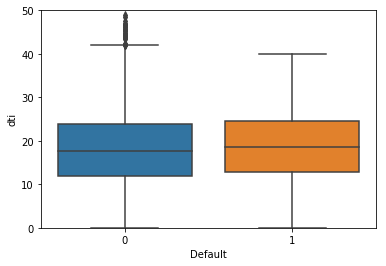

In [16]:
ax1 = sns.boxplot(x='Default', y='dti', data=data)
ax1.set_ybound(lower=0, upper=50)
plt.show()

Defaulting loans have a higher debt-to-income ratio than the non-defaulting loans.

####  $\star$ Grade

In [17]:
data['grade'].value_counts().sort_index()

A    146656
B    251652
C    242759
D    137666
E     69576
F     22605
G      5256
Name: grade, dtype: int64

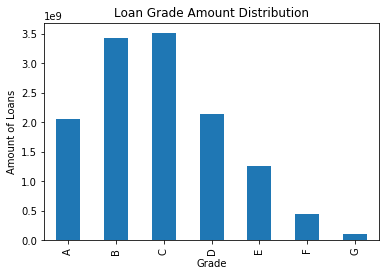

In [18]:
data.groupby('grade')['loan_amnt'].sum().sort_index().plot(kind='bar')
plt.title('Loan Grade Amount Distribution')
plt.xlabel('Grade')
plt.ylabel('Amount of Loans')

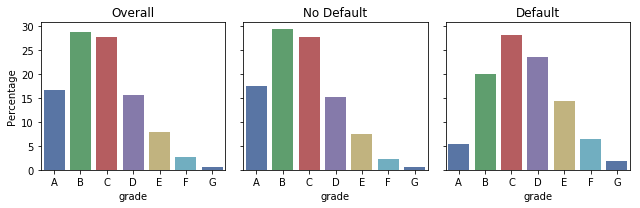

In [19]:
nNoLate = len(data[data['Default'] == 0])
nLate = len(data[data['Default'] == 1])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

sns.barplot(x='grade', y='id', data=data, 
            estimator=lambda x: len(x) / (nLate + nNoLate) * 100,
            ax=ax1, order=sorted(data['grade'].unique()), palette='deep')
sns.barplot(x='grade', y='id', data=data[data['Default'] == 0], 
            estimator=lambda x: len(x) / nNoLate * 100,
            ax=ax2, order=sorted(data['grade'].unique()), palette='deep')
sns.barplot(x='grade', y='id', data=data[data['Default'] == 1], 
            estimator=lambda x: len(x) / nLate * 100,
            ax=ax3, order=sorted(data['grade'].unique()), palette='deep')

ax1.set_title('Overall')
ax2.set_title('No Default')
ax3.set_title('Default')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

The grade of the loan is the companies estimate of the likelyhood of default for the loan. As should probably be expected the best graded loans (A and B) have a higher percentage of loans with no default than with a default. C is approximately the same percentage across no default and default and the worst graded loans (D, E, F and G) have a higher percentage of loans with default than with no default.

####  $\star$ Term

In [20]:
data['term'].value_counts()

 36 months    612705
 60 months    263465
Name: term, dtype: int64

The only two terms of loans that are provided by Lending Club are either a 3 or 5 year loan.

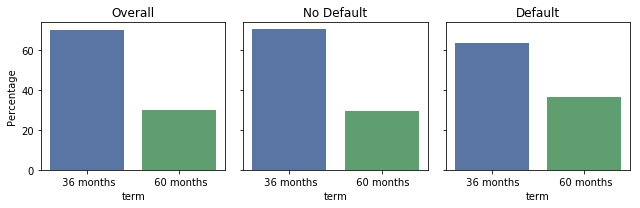

In [21]:
nNoLate = len(data[data['Default'] == 0])
nLate = len(data[data['Default'] == 1])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

sns.barplot(x='term', y='id', data=data, 
            estimator=lambda x: len(x) / (nLate + nNoLate) * 100,
            ax=ax1, order=sorted(data['term'].unique()), palette='deep')
sns.barplot(x='term', y='id', data=data[data['Default'] == 0], 
            estimator=lambda x: len(x) / nNoLate * 100,
            ax=ax2, order=sorted(data['term'].unique()), palette='deep')
sns.barplot(x='term', y='id', data=data[data['Default'] == 1], 
            estimator=lambda x: len(x) / nLate * 100,
            ax=ax3, order=sorted(data['term'].unique()), palette='deep')

ax1.set_title('Overall')
ax2.set_title('No Default')
ax3.set_title('Default')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

The longer term loans (60 months) make up a higher percentage of the defaults than the non-defaulting loans.

####  $\star$ Employment Length

In [22]:
data['emp_length'].value_counts().sort_index()

1 year        56199
10+ years    288282
2 years       77818
3 years       69078
4 years       51835
5 years       55022
6 years       42485
7 years       44229
8 years       43420
9 years       34282
< 1 year      69360
n/a           44160
Name: emp_length, dtype: int64

For employment length we are going to convert this into a number field. For n/a we are going to include these along with the < 1 year, as we can't be sure of the length of employment. This is because if a new customer was not to enter anything then we have to assume that they are not employed when predicting actual loans going forward.

In [23]:
def EmpLength(emp_len):
    if emp_len[:2] == '10':
        return 10
    elif emp_len[:1] in ['<', 'n']:
        return 0
    else:
        return int(emp_len[:1])
    
data['Emp_Length_Years'] = data['emp_length'].apply(lambda x: EmpLength(x))
data['Emp_Length_Years'].value_counts().sort_index()

0     113520
1      56199
2      77818
3      69078
4      51835
5      55022
6      42485
7      44229
8      43420
9      34282
10    288282
Name: Emp_Length_Years, dtype: int64

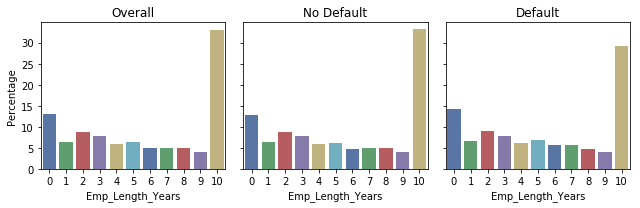

In [24]:
nNoLate = len(data[data['Default'] == 0])
nLate = len(data[data['Default'] == 1])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

sns.barplot(x='Emp_Length_Years', y='id', data=data, 
            estimator=lambda x: len(x) / (nLate + nNoLate) * 100,
            ax=ax1, palette='deep')
sns.barplot(x='Emp_Length_Years', y='id', data=data[data['Default'] == 0], 
            estimator=lambda x: len(x) / nNoLate * 100,
            ax=ax2, palette='deep')
sns.barplot(x='Emp_Length_Years', y='id', data=data[data['Default'] == 1], 
            estimator=lambda x: len(x) / nLate * 100,
            ax=ax3, palette='deep')

ax1.set_title('Overall')
ax2.set_title('No Default')
ax3.set_title('Default')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

Employees that have been at a company 10+ years have lower percentage of the total Defaults than the No-Defaults Loans.

####  $\star$ Loan Amount

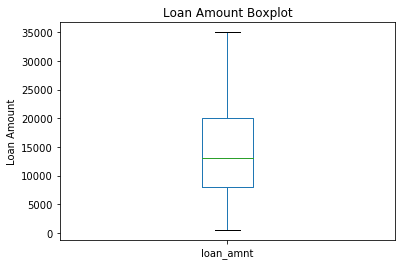

In [25]:
data['loan_amnt'].plot.box()
plt.title('Loan Amount Boxplot')
plt.ylabel('Loan Amount')
plt.xlabel('')

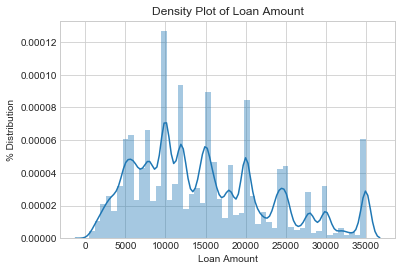

In [26]:
sns.set_style("whitegrid")
ax=sns.distplot(data.loan_amnt)
ax.set(xlabel='Loan Amount', ylabel='% Distribution',title='Density Plot of Loan Amount')
plt.legend()

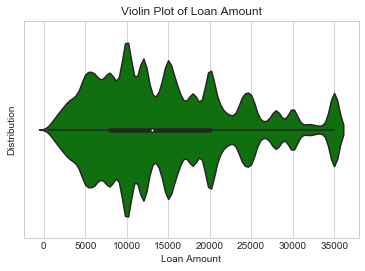

In [27]:
ax = sns.violinplot(data.loan_amnt,color="g");
ax.set(xlabel='Loan Amount', ylabel='Distribution',title='Violin Plot of Loan Amount')
plt.legend()

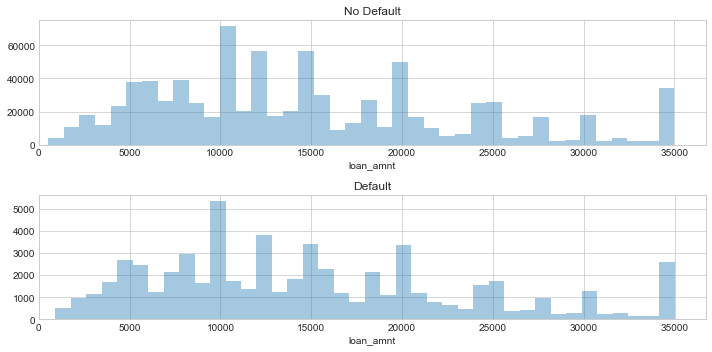

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

sns.distplot(data[data['Default'] == 0]['loan_amnt'], bins=40, ax=ax1, kde=False)
sns.distplot(data[data['Default'] == 1]['loan_amnt'], bins=40, ax=ax2, kde=False)

ax1.set_title('No Default')
ax2.set_title('Default')

ax1.set_xbound(lower=0)
ax2.set_xbound(lower=0)

plt.tight_layout()
plt.show()

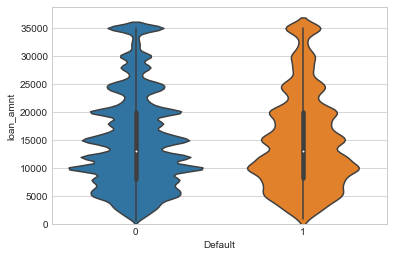

In [29]:
ax1 = sns.violinplot(x='Default', y='loan_amnt', data=data)
ax1.set_ybound(lower=0)
plt.show()

Both no-default and default have a resonably similar distribution of the loan amount.

####  $\star$ Issue Day

In [30]:
data.issue_d.dtype

dtype('O')

In [31]:
# convert the data type from string to date 
data['issue_d'] = pd.to_datetime(data.issue_d)
data['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

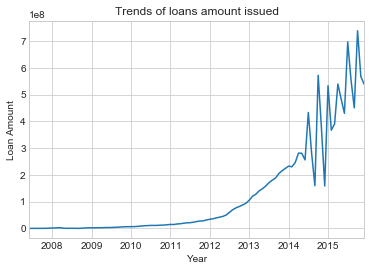

In [32]:
data.groupby('issue_d')['loan_amnt'].sum().plot()
plt.title('Trends of loans amount issued')
plt.xlabel('Year')
plt.ylabel('Loan Amount')

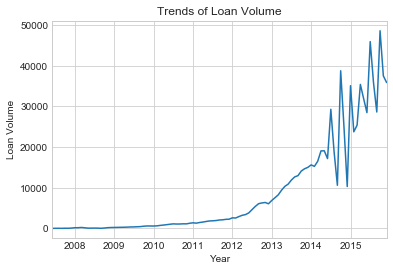

In [33]:
data['issue_d'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Loan Volume')
plt.title('Trends of Loan Volume')

In [34]:
# make new variable to groupby for month and year
data['issue_Y'] = data['issue_d'].dt.year
data['issue_M'] = data['issue_d'].dt.month
data['issue_YM'] = data['issue_d'].apply(lambda x: str(x)[:7])

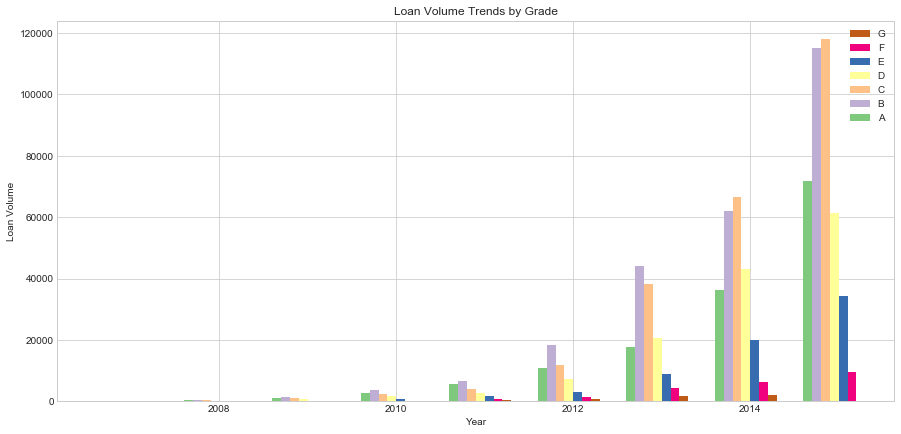

In [35]:
temp = data.groupby(['grade','issue_Y'],as_index=False)['id'].count()
dpoints = np.array(temp)

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
space = 0.3
conditions = np.unique(dpoints[:,0])
categories = np.unique(dpoints[:,1])
n = len(conditions)
width = (1-space)/len(conditions)

for i,cond in enumerate(conditions):
    vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
    pos = [j - (1 - space) / 2. + i * width for j in range(1,len(vals)+1)]
    
    ax.bar(pos, vals, width = width, label=cond, color=cm.Accent(float(i) / n))
    ax.set_xticklabels(['','2008','2010','2012','2014',''])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    ax.set_ylabel("Loan Volume")
    ax.set_xlabel("Year")
        
plt.title('Loan Volume Trends by Grade')

del temp

####  $\star$ Funded Amount Investment

As I am analyzing this data the most recent rates are:

- 30-Year Fixed 3.64%
- 15-Year Fixed 2.76%

To look at the value of loans, lets consider the funded_amnt_inv variable which is described as "The total amount committed by investors for that loan at that point in time". This represents the principle amount of the loan.

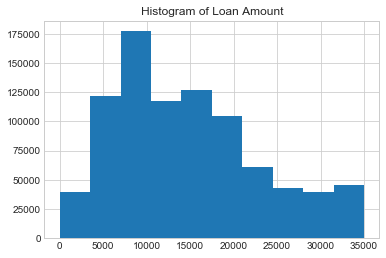

In [36]:
# determine the percet full for each variable
pct_full = data.count()/len(data)
names = list(pct_full[pct_full > 0.75].index)

# reduce to mostly full data
loan = data[names]

# lets look at the distirbution of the loan amount
amount_hist = loan.funded_amnt_inv.hist()
amount_hist.set_title('Histogram of Loan Amount')

In [37]:
loan.funded_amnt_inv.describe()

count    876170.0000
mean      14723.2963
std        8431.1734
min           0.0000
25%        8000.0000
50%       13000.0000
75%       20000.0000
max       35000.0000
Name: funded_amnt_inv, dtype: float64

From this initial look at the loan size we can see that the average loan is a little less than \$15,000, the majority of the loans are around $10,000 and that the loan amount distribution has right skew-fat tails. By segmenting the loan amounts by subgroups, we can paint a better picture of lending practices.

In [38]:
# look at difference between the length of the loans 36 vs. 60 month loans
loan_by_term = loan.groupby('term')
loan_by_term['funded_amnt_inv'].agg([np.count_nonzero, np.mean, np.std])

,count_nonzero,mean,std
term,,,
36 months,612576.0,12449.9232,7782.2634
60 months,263465.0,20010.1733,7455.3440


We can see that there the majority of the loans(a little over 3/4ths) are 3 year loans and are for less principal than the 5 year loans as we would expect.

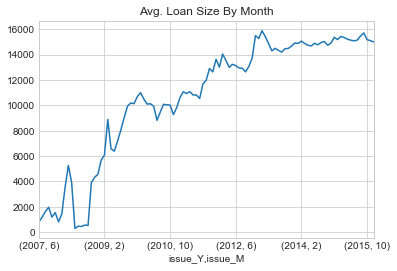

In [39]:
# loans over time
loan_by_month = loan.groupby(['issue_Y','issue_M'])
avgLoanSizeByMonth = loan_by_month['funded_amnt_inv'].agg(np.mean).plot()
avgLoanSizeByMonth.set_title('Avg. Loan Size By Month')

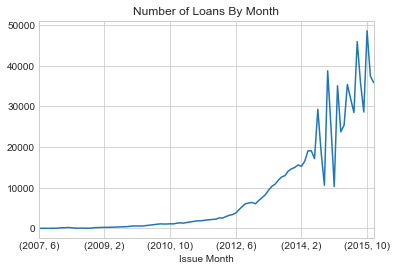

In [40]:
NumLoansPerMo = loan_by_month.id.agg(np.count_nonzero).plot()
NumLoansPerMo.set_title('Number of Loans By Month')
NumLoansPerMo.set_xlabel('Issue Month')

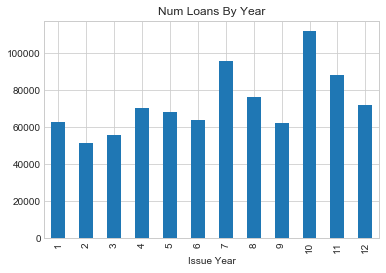

In [41]:
# number loans by year
loan_by_year = loan.groupby('issue_M')
loanYrPlt = loan_by_year.id.agg(np.count_nonzero).plot(kind = 'bar')
loanYrPlt.set_title('Num Loans By Year')
loanYrPlt.set_xlabel('Issue Year')

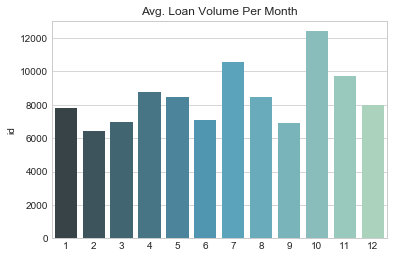

In [42]:
# average loan volume per month

# get the counts by month
loanByMo = loan.groupby(['issue_YM', 'issue_M'])
numByDate = loanByMo.agg(np.count_nonzero).reset_index()

# average the monthly counts across years
counts_by_month = numByDate.groupby('issue_M')
avg_loan_vol = counts_by_month.id.agg(np.mean)

mo_plt = sns.barplot(x = list(avg_loan_vol.index),y = avg_loan_vol, palette = "GnBu_d")
mo_plt.set_title('Avg. Loan Volume Per Month')

There are a few conclusions that can be reached looking at the last few charts:

- We can se that the number of loans that LC is giving overtime is increasing as we would expect with a company that is rapidly growing. I assume that such a rapid growth curve in the number of loans will be accompanied by a decrease in the overall quality of the loans.

- There does appear to be some seasonal trends in the number of loans given within the year. There peaks occuring in July and October which show small trending build ups between months. It is hard to say if these seasonal trends are the same by year, we would have to break the monthly loans down into years. This will be done as follows.


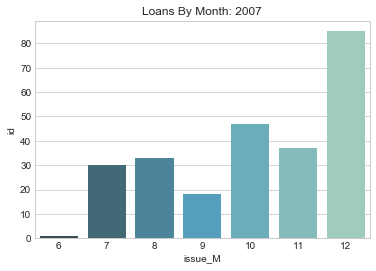

In [43]:
# loan volume over time: intrayear

# get the counts by month/year
loanByMo = loan.groupby(['issue_YM','issue_Y','issue_M'])
numByDate = loanByMo.agg(np.count_nonzero).reset_index()

# get the individual years
years = np.unique(loan['issue_Y'])

# just looking at the first year
tmp_agg = numByDate[numByDate['issue_Y'] == 2007]
tmp_plt = sns.barplot(x = tmp_agg['issue_M'],y = tmp_agg.id, palette = "GnBu_d")
tmp_plt.set_title('Loans By Month: 2007')

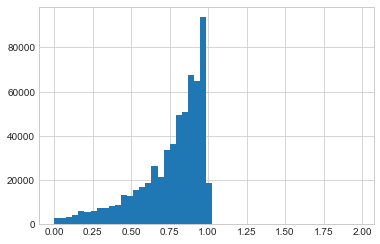

In [44]:
loan['pct_paid'] = loan.out_prncp / loan.loan_amnt
loan[loan.loan_status == 'Current'].pct_paid.hist(bins = 50)

del loan, loan_by_term, loan_by_month, loan_by_year, loanByMo

####  $\star$ Loans by State

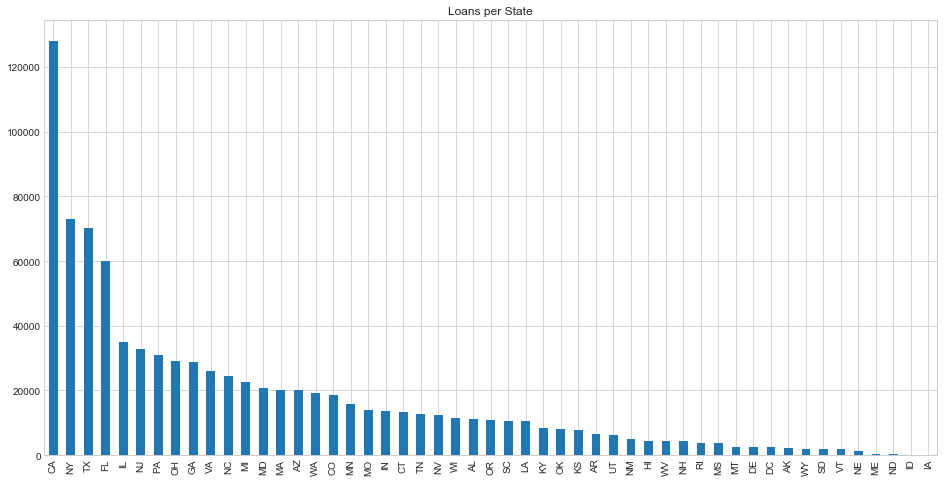

In [45]:
state_count = data.addr_state.value_counts()
state_count.plot(kind = 'bar',figsize=(16,8), title = 'Loans per State')

In [46]:
from collections import OrderedDict

State_List = []
for x in data['addr_state']:
    if x not in State_List:
        State_List.append(x)

Loan_Amount = []
Average_Balance = []
Default_Rate = []
Weighted_Rate = []
Average_Income = []
Average_Employment_Length = []
Average_DTI = []
Average_Inq_12 = []
Average_Inq_6 = []

for x in State_List:
    new_df = data[data['addr_state'] == x]
    
    Loan_Sum = sum(new_df['funded_amnt'])
    Loan_Amount.append(Loan_Sum)
    
    Average_Balance.append(Loan_Sum/len(new_df['funded_amnt']))
    
    Defaults = []
    for value in new_df.loan_status:
        if value == 'Default':
            Defaults.append(1)
        if value == 'Charged Off':
            Defaults.append(1)
        if value == 'Late (31-120 days)':
            Defaults.append(1)   
        if value == 'Late (16-30 days)':
            Defaults.append(1)
        if value == 'Does not meet the credit policy. Status:Charged Off':
            Defaults.append(1) 
    Default_R = len(Defaults) / len(new_df.loan_status)  
    Default_Rate.append(Default_R)
    
    new_df['weighted'] = (new_df['int_rate']/100)*new_df['funded_amnt']
    Weighted_Sum = sum(new_df['weighted'])
    Weighted_i_rate = Weighted_Sum / Loan_Sum
    Weighted_Rate.append(Weighted_i_rate)
    
    Income_Average = np.mean(new_df['annual_inc'])
    Average_Income.append(Income_Average)
    
    Employ_Length = []
    for term in new_df.emp_length:
        if term == '10+ years':
            Employ_Length.append(10)
        if term == '< 1 year':
            Employ_Length.append(0.5)    
        if term == '1 year':
            Employ_Length.append(1)
        if term == '3 years':
            Employ_Length.append(3)
        if term == '8 years':
            Employ_Length.append(8)
        if term == '9 years':
            Employ_Length.append(9)    
        if term == '4 years':
            Employ_Length.append(4)
        if term == '5 years':
            Employ_Length.append(5)
        if term == '6 years':
            Employ_Length.append(6)
        if term == '2 years':
            Employ_Length.append(2)    
        if term == '7 years':
            Employ_Length.append(7)
        if term == 'n/a':
            Employ_Length.append(0)  
            
    Average_Employment_Length.append(np.mean(Employ_Length))        
    
    DTI_Average = np.mean(new_df['dti'])
    Average_DTI.append(DTI_Average)
    
    inquiry_average = np.mean(new_df['inq_last_12m'])
    Average_Inq_12.append(inquiry_average)
    
    inquiry_average_6 = np.mean(new_df['inq_last_6mths'])
    Average_Inq_6.append(inquiry_average_6)
    
combine_data = OrderedDict([ ('Loan_Funding',Loan_Amount),
                         ('Average_Balance', Average_Balance),
                         ('Default_Rate',  Default_Rate),
                         ('Weighted_Rate', Weighted_Rate),
                         ('Average_Income', Average_Income),
                         ('Average_Employment_Length', Average_Employment_Length),
                         ('Average_DTI', DTI_Average),
                         ('12m_Inquiries', Average_Inq_12),
                         ('6m_Inquiries', Average_Inq_6),   
                         ('code', State_List)])

df_plot = pd.DataFrame.from_dict(combine_data)
df_plot = df_plot.round(decimals=2)
df_plot.head()

,Loan_Funding,Average_Balance,Default_Rate,Weighted_Rate,Average_Income,Average_Employment_Length,Average_DTI,12m_Inquiries,6m_Inquiries,code
0,2.8665e+08,14213.08,0.07,0.14,71698.49,5.43,20.77,1.98,0.68,AZ
1,4.2830e+08,14937.41,0.06,0.14,75025.80,5.76,20.77,1.97,0.63,GA
2,5.3243e+08,15198.76,0.06,0.13,76904.44,5.79,20.77,1.99,0.90,IL
3,1.8751e+09,14644.15,0.07,0.13,79250.34,5.70,20.77,1.97,0.64,CA
4,1.4784e+08,13714.37,0.06,0.13,65729.84,5.52,20.77,1.97,0.57,OR


Next we will choose the state 'Tennessee' for further analysis.

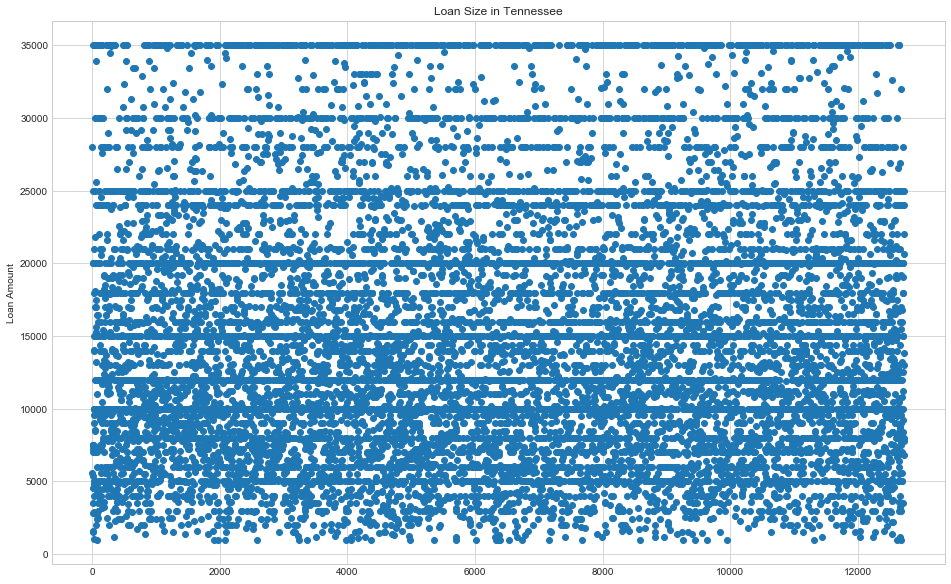

In [47]:
tn_data = data.loc[data.addr_state == 'TN']
tn_loan_amnt = tn_data.loan_amnt
tn_x = range(1, len(tn_loan_amnt)+1)

plt.figure(figsize=(16, 10))
plt.scatter(tn_x, tn_loan_amnt)

plt.ylabel("Loan Amount")
plt.title("Loan Size in Tennessee")
plt.show()

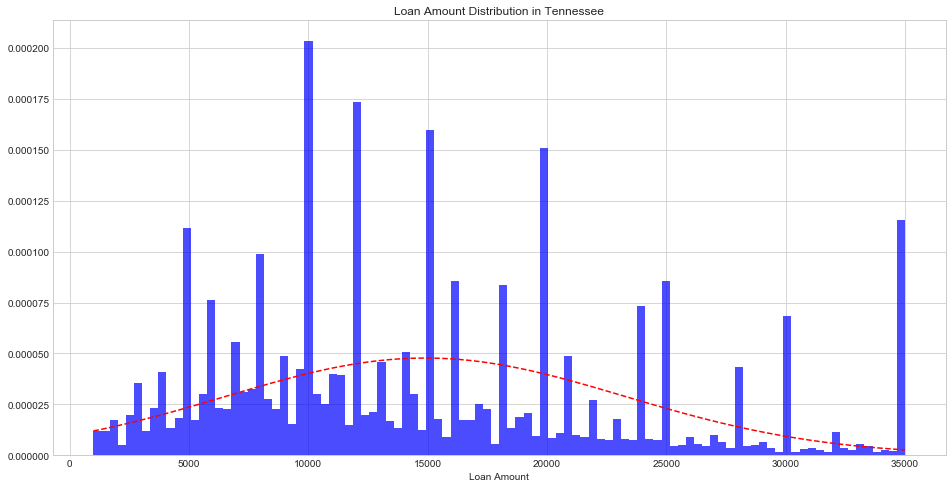

In [48]:
plt.figure(figsize=(16,8))

mu = tn_loan_amnt.mean()
sigma = tn_loan_amnt.std()
num_bins = 100

n, bins, patches = plt.hist(tn_loan_amnt, num_bins, normed=1, facecolor='blue', alpha=0.7)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')

plt.xlabel("Loan Amount")
plt.title("Loan Amount Distribution in Tennessee")
plt.show()

Now that we got a glimpse of Loan Sizes in Tennessee, let's see how the number of loans being issued looks like over the years.

It looks like there is a huge boom in number of loans being issued over the last couple years. Nashville, TN has been named the new 'IT' city and many people have been moving into the area. Maybe there is some kind of correlation between Nashville's boom and issued loans.

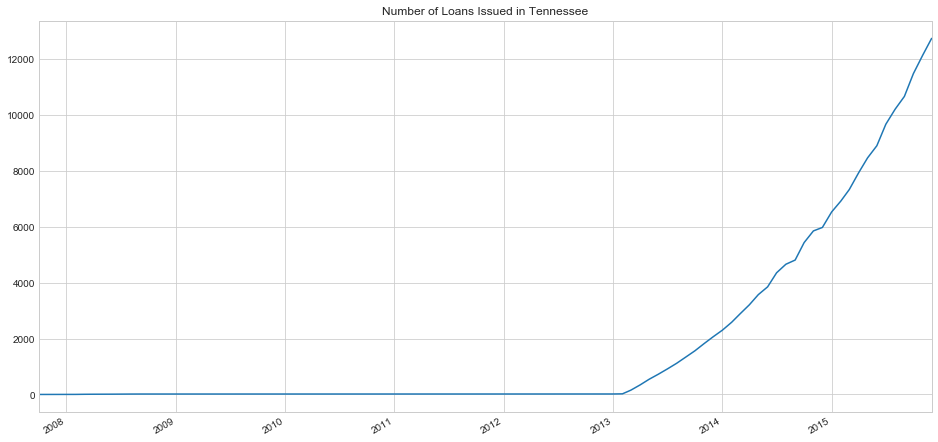

In [49]:
tloan_tn_df = tn_data['issue_d'].value_counts().sort_index()
tloan_tn_df = tloan_tn_df.cumsum()
tloan_tn_df.plot(figsize=(16,8), title='Number of Loans Issued in Tennessee')

del combine_data, df_plot

####  $\star$ Get Low Interest Rates

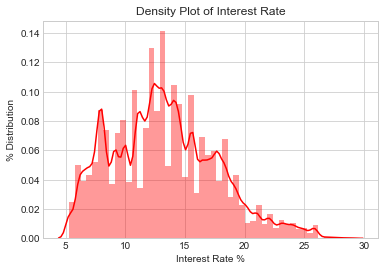

In [50]:
# density distribution of interest rate
sns.set_style("whitegrid")
ax=sns.distplot(data.int_rate, color="r")
ax.set(xlabel='Interest Rate %', ylabel='% Distribution',title='Density Plot of Interest Rate')
plt.legend()

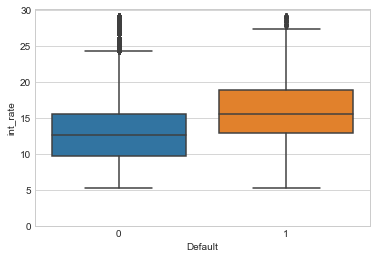

In [51]:
ax1 = sns.boxplot(x='Default', y='int_rate', data=data)
ax1.set_ybound(lower=0)
plt.show()

The defaulting loans have a higher interest rate than non-defaulting loans.

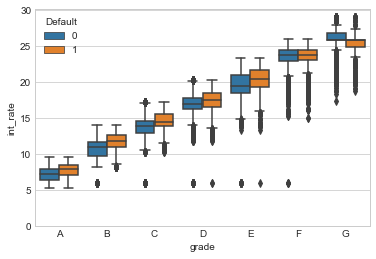

In [52]:
ax1 = sns.boxplot(x='grade', y='int_rate', data=data, hue='Default', order=sorted(data['grade'].unique()))
ax1.set_ybound(lower=0)
plt.show()

Even controlling for the grade of the loan (as this will be used to calculate the interest rate), the defaulting loans still have a higher interest rate than non-defaulting loans until you get to grades F and G.

In [53]:
# investigate the relationship between interest rate of different grades and terms
loan_data = data[['grade','int_rate','term']]
loan_data = loan_data.groupby(['grade','term']).mean()
loan_data = loan_data.reset_index()

#Reorganize the data using pivot command
loan_data = loan_data.pivot(index='grade', columns='term',values='int_rate')
loan_data

term,36 months,60 months
grade,,
A,7.2192,8.0007
B,10.8737,10.6624
C,13.9339,14.1007
D,17.1898,17.1940
E,19.8593,19.9647
F,23.6317,23.6577
G,25.6579,25.8833


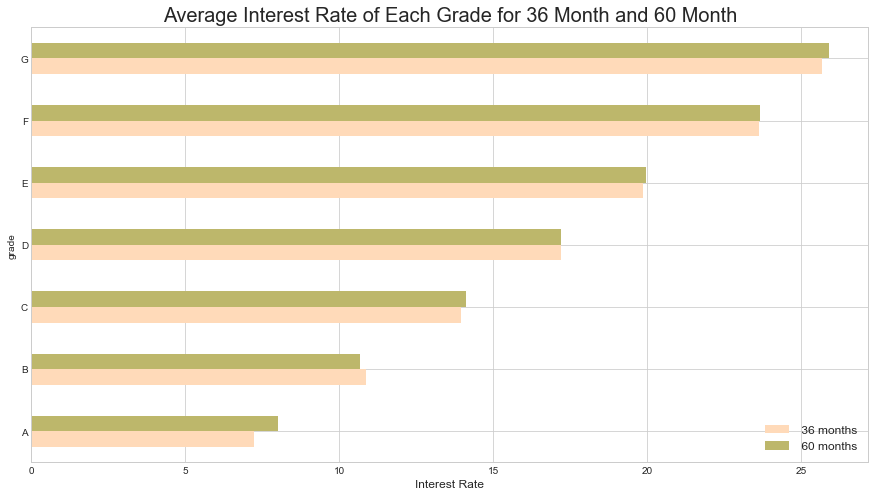

In [54]:
# draw a horizental bar chart to compare rates of different conditions
pic=loan_data.plot(kind='barh',figsize=(15,8),color=['peachpuff','darkkhaki'])
pic.legend(loc='lower right',fontsize=12)
pic.set_title('Average Interest Rate of Each Grade for 36 Month and 60 Month',fontsize=20)
pic.set_xlabel('Interest Rate',fontsize=12)

Now I will divide loan_amnt to four category: low, medium-low, medium-high and high loan_amnt, and also divide annual_income to four category: low, medium-low, medium-high and high annual_inc.

In [55]:
import sqlite3

# extract needed data from the database
con = sqlite3.connect('datasets/database.sqlite')

loan_rate_related = pd.read_sql_query( """
SELECT loan_amnt, term, int_rate, grade, emp_title, emp_length, home_ownership, annual_inc,issue_d,
purpose, title, addr_state,application_type,
CASE WHEN loan_amnt < 8000 THEN 'low' 
     WHEN loan_amnt >= 8000 AND loan_amnt < 13000 THEN 'medium-low'
     WHEN loan_amnt >= 13000 AND loan_amnt < 20000 THEN 'medium-high'
     WHEN loan_amnt >= 20000 THEN 'high' END as loan_amnt_level,
CASE WHEN annual_inc < 45000 THEN 'low'
     WHEN annual_inc >= 45000 AND annual_inc <65000 THEN 'medium-low'
     WHEN annual_inc >= 65000 AND annual_inc < 90000 THEN 'medium-high'
     WHEN annual_inc >= 90000 THEN 'high' END as annual_inc_level
FROM loan
""",con)

loan_rate_related.head()

,loan_amnt,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,purpose,title,addr_state,application_type,loan_amnt_level,annual_inc_level
0,5000.0,36 months,10.65%,B,None,10+ years,RENT,24000.0,Dec-2011,credit_card,Computer,AZ,INDIVIDUAL,low,low
1,2500.0,60 months,15.27%,C,Ryder,< 1 year,RENT,30000.0,Dec-2011,car,bike,GA,INDIVIDUAL,low,low
2,2400.0,36 months,15.96%,C,None,10+ years,RENT,12252.0,Dec-2011,small_business,real estate business,IL,INDIVIDUAL,low,low
3,10000.0,36 months,13.49%,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-2011,other,personel,CA,INDIVIDUAL,medium-low,medium-low
4,3000.0,60 months,12.69%,B,University Medical Group,1 year,RENT,80000.0,Dec-2011,other,Personal,OR,INDIVIDUAL,low,medium-high


In [56]:
# deal with NULL values
loan_rate_related = loan_rate_related.dropna(subset=["loan_amnt","term","int_rate","grade",
                                                     "emp_length","home_ownership","annual_inc",
                                                     "issue_d","purpose","addr_state","application_type"])
# Convert int_rate to float
loan_rate_related["int_rate"]=loan_rate_related["int_rate"].apply(lambda x: float(x.rstrip("%")))

Next, I will explore how all variables (loan amount, term, grade, employee length, home ownership, annual income, issue day, purpose, state, application type) affect interest rate.

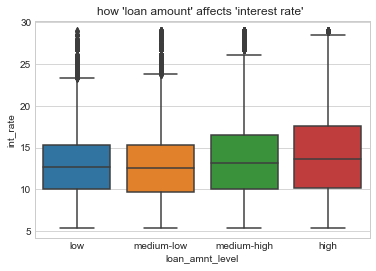

In [57]:
# Interest Rate vs. Loan Amount

order = ["low", "medium-low","medium-high","high"]
sns.boxplot(x='loan_amnt_level',y="int_rate",data = loan_rate_related,order=order)
plt.title("how 'loan amount' affects 'interest rate' ")

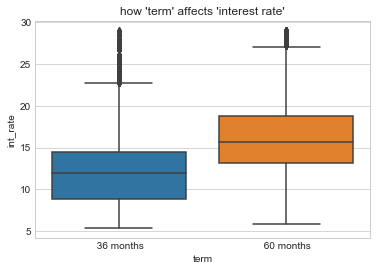

In [58]:
# Interest Rate vs. Term

plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='term',y="int_rate",data = loan_rate_related)
plt.title("how 'term' affects 'interest rate'")

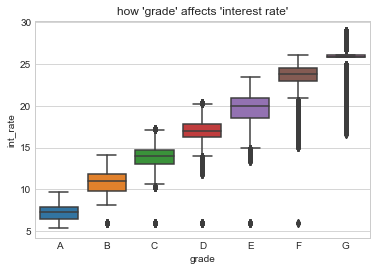

In [59]:
# Interest Rate vs. Grade

plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='grade',y="int_rate",data = loan_rate_related,order=["A","B","C","D","E","F","G"])
plt.title("how 'grade' affects 'interest rate'")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

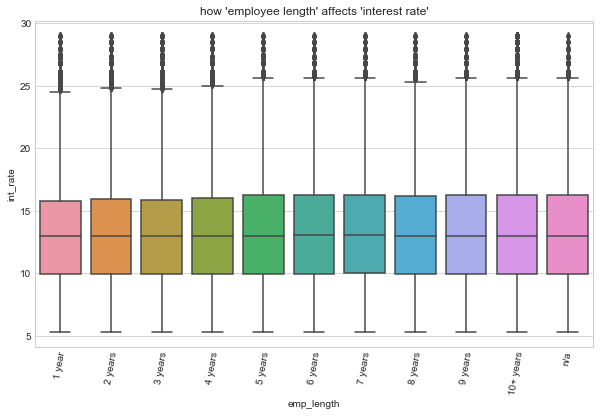

In [60]:
# Interest Rate vs. Employee Length

data["emp_length"].unique()
order=['1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years','n/a']
plt.rc("figure", figsize=(10, 6))
sns.boxplot(x='emp_length',y="int_rate",data = loan_rate_related,order=order)
plt.title("how 'employee length' affects 'interest rate'")
plt.xticks(size = 10,rotation = 80)

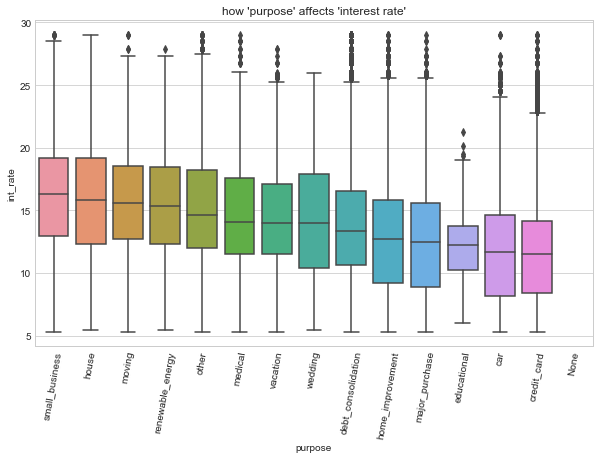

In [61]:
# Interest Rate vs. Purpose

rate_by_purpose = pd.read_sql_query( """
SELECT purpose, avg(int_rate) AS avg_rate
FROM loan
GROUP BY purpose
ORDER BY avg_rate desc
""",con)

order = rate_by_purpose["purpose"].tolist()
sns.boxplot(x='purpose',y="int_rate",data = loan_rate_related, order = order)
plt.xticks(size = 10,rotation = 80)
plt.title("how 'purpose' affects 'interest rate'")

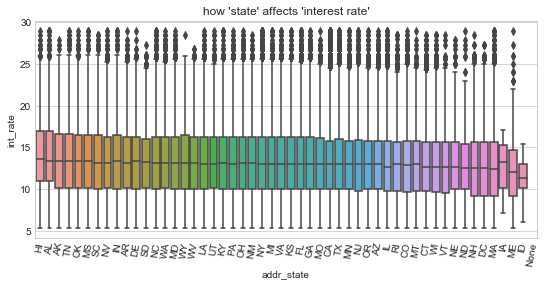

In [62]:
# Interest Rate vs. State

rate_by_state = pd.read_sql_query( """
SELECT addr_state, avg(int_rate) AS avg_rate
FROM loan
GROUP BY addr_state
ORDER BY avg_rate desc
""",con)

plt.rc("figure", figsize=(9, 4))
order = rate_by_state["addr_state"].tolist()
sns.boxplot(x='addr_state',y="int_rate",data = loan_rate_related, order = order)
plt.xticks(size = 10,rotation = 80)
plt.title("how 'state' affects 'interest rate'")

del loan_rate_related, rate_by_purpose, rate_by_state, data

- It turns out that loan amount, employee length, annual income, home ownership,state and issue month do not affect the interest rate much.
- the term, grade, purpose and application type would affect the interest rate to some extent.
- It's very likely that you can get low interest rate if the term is 36 months, the grade is low, the purpose is one of educational, car or credit card, the state is Idaho, and the type is "individual"!

## Model Building

In [63]:
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# read the input
data = pd.read_csv('datasets/loan.csv', low_memory = False)

In [64]:
# drop these features for now
data.drop([  'id',
             'member_id',
             'emp_title',
             'title',
             'url',
             'zip_code',
             'verification_status',
             'home_ownership',
             'issue_d',
             'earliest_cr_line',
             'last_pymnt_d',
             'next_pymnt_d',
             'desc',
             'last_credit_pull_d'], axis=1, inplace=True)

In [65]:
# drop columns with less than 25% data
lack_of_data_idx = [x for x in data.count() < len(data)*0.25]
data.drop(data.columns[lack_of_data_idx], 1, inplace=True)

In [66]:
# fill in NAN values
data.mths_since_last_delinq = data.mths_since_last_delinq.fillna(data.mths_since_last_delinq.median())
data.dropna(inplace=True)

In [67]:
# create an bad/good loan indicator feature
data['good_loan'] = np.where((data.loan_status == 'Fully Paid') |
                             (data.loan_status == 'Current')    | 
                             (data.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)

In [68]:
# hot encode some categorical features
columns = ['term', 'grade', 'sub_grade', 'emp_length', 'purpose', 'application_type','addr_state',
           'pymnt_plan', 'initial_list_status']

for col in columns:
    tmp_df = pd.get_dummies(data[col], prefix=col)
    data = pd.concat((data, tmp_df), axis=1)

In [69]:
# drop attributes that we hot-encoded
data.drop(['loan_status',
           'term',
           'grade',
           'sub_grade',
           'emp_length',
           'addr_state',
           'initial_list_status',
           'pymnt_plan',
           'purpose',
           'application_type'], axis=1, inplace=True)

In [70]:
# rename some features to concur w/ some algorithms
data = data.rename(columns= {'emp_length_< 1 year':'emp_length_lt_1 year','emp_length_n/a':'emp_length_na'})

In [71]:
# due to resource limitation, we limit data to only the first 10,000 records.
data = data[:10000]

In [72]:
y = data['good_loan']
X = data.iloc[:, data.columns != 'good_loan']

# deal with inbalanced data
sm = SMOTE(k_neighbors=10, random_state=44, kind = 'svm')
X, y = sm.fit_sample(X, y)

# split train/test data
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=44)

# use robust scaler to reduce outliers
rob_scaler = RobustScaler()
X_train_R = rob_scaler.fit_transform(X_train)
X_test_R  = rob_scaler.transform(X_test)

In [73]:
xgb = XGBClassifier()
xgb.fit(X_train_R, y_train)
xgb_pred = xgb.predict(X_test_R)    
scores = cross_val_score(xgb, X_test_R, y_test, cv=5)

print("1. Scores:", scores)
print("2. Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))
print("3. Classification Report:", mt.classification_report(y_test, xgb_pred))
print("4. Confusion Matrix:", mt.confusion_matrix(y_test, xgb_pred))

1. Scores: [ 0.98166432  0.96755994  0.96892655  0.97457627  0.97171146]
2. Accuracy: 0.97 (+/- 0.01)

3. Classification Report:              precision    recall  f1-score   support

          0       1.00      0.96      0.98      1837
          1       0.96      1.00      0.98      1704

avg / total       0.98      0.98      0.98      3541

4. Confusion Matrix: [[1764   73]
 [   1 1703]]


roc_auc: 0.979837220565


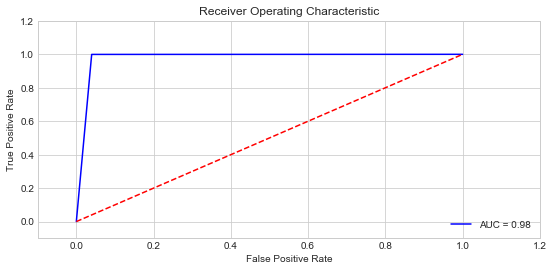

In [74]:
# generate actual and predicted values
actual = y_test
predictions = xgb_pred

# calculate false positive rate and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc:',roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')